# <p style="text-align: center;"> Practical Quantum Computing with Cirq </p> 
<p style="text-align: center;"> Ryan LaRose </p>
<p style="text-align: center;"> Department of Computational Mathematics, Science, and Engineering, Michigan State University </p>
<p style="text-align: center;"> Department of Physics and Astronomy, Michigan State University </p>

### <p style="text-align: center;"> Abstract </p> 
<p style="text-align: justify;"> In July 2018, the <a href="https://quantumcomputingreport.com">Quantum Computing Report</a> published an <a href="https://quantumcomputingreport.com/wp-content/uploads/2018/06/Overview-and-Comparison-of-Gate-Level-Quantum-Software-Platforms-Final-June-21-2018.pdf">in-depth analysis of four major gate-model quantum software platforms</a>: pyQuil by Rigetti, QISKit by IBM, ProjectQ by ETH Zurich, and the Quantum Developer Kit by Microsoft. Shortly after, Google announced the release of their own quantum software platform: Cirq. In this paper, we provide an overview and comparative analysis of this newly-released software in reference to the previously-reviewed quantum software platforms. Our analysis proceeds similarly by covering language syntax through example programs, library support, quantum simulators, and quantum computer capabilities. We additionally cover more advanced features of the software including the strong support for variational quantum algorithms and near-term quantum computing. </p> 

# <p style="text-align: center;">I. Introduction </p> 

<p style="text-align: justify;"> 
Quantum computing is transitioning from a theoretical to practical phase. Historically, researchers have asked questions about the possibilities of speedups through black-box access to abstract, idealized quantum computers. Recently, small, imperfect quantum computers have been fabricated and made available over the cloud. A significant body of literature is emerging as researchers use these devices to solve problems in nuclear physics <a href="#Du2018">[Du2018]</a>, quantum chemistry <a href="#Pe2014">[Pe2014]</a>, condensed matter <a href="#La2018">[La2018]</a>, optimization <a href="#Fa2018">[Fa2014]</a>, number theory <a href="#An2018">[An2018]</a>, graph theory <a href="#Fa2018">[Fa2018]</a>, and even quantum computing itself <a href="#Kh2018">[Kh2018]</a>. While these problems are small and easily handled by conventional computers, the prospect of large-scale quantum computers could quickly change this. Even on current quantum computers, certain contrived problems may soon demonstrate "quantum supremacy" <a href="#Ne2017">[Ne2017, Ma2018]</a>, an exciting landmark in the history of computation. 
</p>

<p style="text-align: justify;"> 
This theoretical-to-practical progression of the field necessitates access to quantum computers that is much different from black box access on pen and paper. Many institutions in industry and academia have recognized this and began building tools for this purpose, and a slew of startup companies has emerged to fill the gaps in the transition to practical quantum computing. The following diagram represents a snapshot of this rapidly evolving landscape:
</p>

<img src="qchart.jpg" >
<p style="text-align: center;">Schematic diagram showing quantum computing companies and their position in the quantum software stack. "Full-stack providers" focus on all areas of the stack whereas "target providers" focus on particular areas. Because companies that do algorithms/applications frequently do software as well, we have combined these two categories on the right. (Similarly for hardware & compilation and control.)</p>


<p style="text-align: justify;"> 
For most "full-stack" quantum computing companies, access to quantum computers is granted over the cloud, and the interaction between research scientists and quantum computers is mediated by a software platform with API access. To an outside observer, this interaction does not warrant much thought: it just needs to allow users to implement quantum gates on qubits. However, many practical considerations emerge when using a software interface to communicate with a real or simulated quantum computer. Among these are the following:
</p>

1. What gate operations are natively built-in?
1. Can a gate that's not native be implemented into a quantum algorithm? How difficult is it to do this?
1. How many quantum computers does the platform give access to?
1. Is compilation handled automatically by the software? And to what degree of optimality?
1. How do job requests to quantum computers get handled? In a queue, dedicated time?
1. What quantum computer simulators can be used to test algorithms? How many qubits can be simulated? Is the simulator noisy or noiseless?
1. Does every quantum algorithm have to be programmed manually? Or are some common subroutines built-in?
1. What <i>classical</i> programming language is the software written in?
1. How easy is it to create, work with, and manipulate quantum circuits?
1. How easy is it to parametrize algorithms for near-term quantum computing?

<p style="text-align: justify;"> 
Each of these considerations is important from a practical perspective. For example, an algorithm on many qubits may be better implemented on a software platform with a more high-performance simulator; an algorithm with many gates may be better for a platform with higher fidelity qubits; an algorithm with many non-standard gates may be better for a platform with an optimal compiler. Other considerations such as examples, tutorials, and documentation are equally important as they help bring in new users and answer questions of experienced users.
</p>

<p style="text-align: justify;"> 
For these reasons, it is both valid and important to evaluate quantum software platforms as more than the simple interface they may appear to be. To this end, the Quantum Computing Report published an article <a href="#LaR2018">[LaR2018]</a> comparing Forest by Rigetti, QISKit by IBM, ProjectQ by ETH Zurich, and the Quantum Developer Kit by Microsoft. Each platform was found to have different strengths and different emphases that determined the set of problems best-suited for the environment. The purpose of this article is to introduce and analyze Cirq in a similar fashion.
</p>

<p style="text-align: justify;"> 
To this end, the rest of the article is organized as follows. After briefly commenting on the format of this article, we cover installation, documentation, language syntax, and quantum computer/simulator support in Cirq. We then transition into more advanced features like circuit manipulation and optimization. Lastly, we conclude with an example of a variational quantum algorithm to demonstrate the near-term capabilities of Cirq. Throughout, we refer back to previously covered software platforms to maintain the comparative analysis in our previous installation.
</p>

## <p style="text-align: center;"> A. Format of the Article </p> 

<p style="text-align: justify;"> 
This article was written as a Jupyter Notebook and exported as an HTML file. The HTML file is hosted on the [Quantum Computing Report website](https://quantumcomputingreport.com) and the Jupyter notebook is hosted on [GitHub](https://github.com/rmlarose). In the HTML version, all code and all outputs are visible in the article, but the code is not able to run. To interactively run the code while reading through the article, see the Jupyter Notebook version. In order to run the code, a working installation of Cirq is required (see <i>Installation</i> below). The Cirq code in the notebook version will be kept up-to-date with future versions/releases of Cirq. The article also assumes basic familarity with quantum computing, for which many good [resources](https://quantumcomputingreport.com/resources/education/) now exist.
</p>

# <p style="text-align: center;"> II. The Basics of Cirq </p> 

<table style="width:100%">
  <tr>
    <th>Institution</th>
    <!--<th>First Release</th>-->
    <th>Version</th>
    <!--<th>Open Source?</th>-->
    <!--<th>License</th>-->
    <!--<th>Homepage</th>-->
    <th>GitHub</th>
    <th>Documentation</th>
    <th>OS</th>
    <th>Requirements</th>
    <th>Classical Language</th>
    <th>Quantum Language</th>
    <th>Quantum Hardware</th>
    <th>Simulator</th>
    <!--<th>Features</th>-->
  </tr>
  <tr>
    <td><a href="https://ai.google/research/teams/applied-science/quantum-ai/">Google Quantum AI</a></td>
    <td>v0.4.0</td> 
    <td><a href="https://github.com/quantumlib/Cirq">Git</a></td>
    <td><a href="https://cirq.readthedocs.io/en/latest/">Docs</a></td>
      <td>Mac, Windows, Linux</td>
      <td><a href="https://www.python.org/downloads/">Python</a> 3.5 or greater (else Python 2.7)</td> 
      <td>Python</td>
      <td>----</td>
      <td>Foxtail (22 qubits), Bristlecone (72 qubits)</td>
      <td>~20-30 qubits</td>
  </tr>
</table>

<p style="text-align: justify;"> 
Cirq is an open-source Python framework for "creating, editing, and invoking Noisy Intermediate-Scale Quantum (NISQ) circuits" <a name="#Al2018">[Al2018]</a>. The first version of the software was publicly announced in July 2018; the code is still in alpha testing and under development. As such, some features or code included in this article may need modifications for future versions of Cirq. This article should be considered a review for the version of Cirq at the time of writing, which is listed in the table above. (As mentionec above, the Jupyter Notebook version of this article, hosted online at [GitHub](https://github.com/rmlarose), will be kept up to date as future versions of Cirq are released.)
</p>

<img src="cirq-overview.png" width=500>
<p style="text-align: center;">The components of Cirq. When installed onto a computer, Cirq provides a library for working with quantum circuits and a high-performance local quantum circuit simulator. As of December 2018, connection to hardware devices or the "Quantum Engine"/"Quantum Cloud Services" is unavailable to general users, but this is expected to change in the future.</p>

## <p style="text-align: center;"> A. Installation </p> 

The easiest way to install `Cirq` is by using pip via

```
pip install cirq
```
<p style="text-align: justify;"> 
at a command line. Without leaving the notebook, executing the cell below will try to install Cirq on the users computer. Alternatively, the source code for Cirq can be obtained from <a href="https://github.com/quantumlib/Cirq">https://github.com/quantumlib/Cirq</a>. For complete installation instructions on multiple platforms, see the documentation at <a href="https://cirq.readthedocs.io/en/latest/install.html">https://cirq.readthedocs.io/en/latest/install.html</a>. Readers who simply wish to read the article without using Cirq can ignore this step.
</p>

In [9]:
"""Attempts to pip install Cirq without leaving the notebook."""
#!pip install --upgrade pip
#!pip install cirq

'Attempts to pip install Cirq without leaving the notebook.'

## <p style="text-align: center;"> B. Documentation and Tutorials </p> 

<p style="text-align: justify;"> 
The <a href="https://cirq.readthedocs.io/en/latest/install.html">documentation for Cirq</a> contains instructions on installation for all three major operating systems, an in-depth tutorial for the variational quantum eigensolver, and details on three major components of the Cirq library: circuits, gates, and simulation. In addition, the section on _Schedules and Devices_ details how Cirq can be used with specific quantum hardware and reflects the emphasis on near-term quantum computing. The documentation also contains a detailed API reference for the entire library and development guidelines for those who may want to contribute to the source code.
</p>

## <p style="text-align: center;"> C. Language Syntax </p> 

<p style="text-align: justify;"> 
As in our previous coverage of quantum software platforms, we include example programs to demonstrate the language syntax. Below, we implement the "quantum random bit generator" algorithm. To use the functionality of Cirq, we first import the library (and additional libraries we'll use throughout the article).
</p>

In [10]:
"""Library imports for the article."""
import cirq

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<p style="text-align: justify;"> 
In what follows we create a circuit and instantiate it with the operations for the algorithm (Hadamard and measure).
</p>

In [11]:
"""Create a random number generator circuit using Cirq."""
# get a qubit register
qbits = [cirq.LineQubit(0)]

# get a quantum circuit
circ = cirq.Circuit()

# add the instructions to the circuit
circ.append([cirq.H(qbits[0]),
             cirq.measure(qbits[0], key="z")])

<p style="text-align: justify;"> 
Note that Cirq defines qubits to be `LineQubit`s or `GridQubit`s, since these are common constructions in NISQ computers. The former is indexed by one integer, as we have done in Line 4 above, and the latter by two (x, y coordinates). Qubits are commonly defined in lists (or generally iterables) for easy indexing in algorithms. In Line 7 above we instantiate a circuit, and in Line 10 we append the instructions for the algorithm. (There are multiple ways to add instructions to an algorithm in Cirq. For most of this article, we'll stick to the above method for simplicity. See Section III.A for alternatives.)
</p>

<p style="text-align: justify;"> 
The Cirq library provides text diagram representation of quantum circuits, which can be visualized by printing out the circuit:
</p>

In [12]:
"""Print out the random number generator circuit."""
print(circ)

0: ───H───M('z')───


<p style="text-align: justify;"> 
While these diagrams are not of publication quality like those that can be made in ProjectQ or even QISKit, they are a useful tool for verifying correctness of quantum circuits and debugging. Note that measurements are made with a `key` to easily access the results of running the circuit, as we will see below.
</p>

## <p style="text-align: center;"> D. Quantum Computers </p> 

<p style="text-align: justify;"> 
Cirq does not currently provide cloud access to it's quantum computers for general users. Indeed, as per the documentation in <a href="https://github.com/quantumlib/Cirq/blob/master/cirq/google/engine/engine.py">Cirq's engine class</a>:
<p style="text-align: justify;"> 

<blockquote cite="">
"In order to run on[e] must have access to the Quantum Engine API. Access to this
API is (as of June 22, 2018) restricted to invitation only."
</blockquote>


<p style="text-align: justify;"> 
Nonetheless, it is known that Google has quantum computers that have been stated to be made available over the cloud in the near future <a name="#Al2018">[Al2018]</a>, using Cirq as an interface. Indeed, Cirq already provides details on these devices. For instance, the architecture of the 22-qubit FoxTail computer can be printed out in Cirq by doing:
</p>

In [13]:
"""Print out the architecture of the FoxTail quantum computer."""
print("FoxTail has {} qubits arranged in the following topology:\n".format(len(cirq.google.Foxtail.qubits)))
print(cirq.google.Foxtail)

FoxTail has 22 qubits arranged in the following topology:

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


The 72-qubit Bristlecone computer, with which quantum supremacy may be demonstrated on, can be displayed similarly:

In [14]:
"""Print out the architecture of the Bristlecone quantum computer."""
print("Bristlecone has {} qubits arranged in the following topology:\n".format(len(cirq.google.Bristlecone.qubits)))
print(cirq.google.Bristlecone)

Bristlecone has 72 qubits arranged in the following topology:

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)─

It should be noted that Cirq provides built-in functionality to convert it's circuits to OpenQASM code:

In [15]:
"""Generate and print out the OpenQASM code for the random number generator circuit."""
print(circ.to_qasm())

// Generated from Cirq v0.4.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [0]
qreg q[1];
creg m_z[1];


h q[0];
measure q[0] -> m_z[0];



<p style="text-align: justify;"> 
This functionality makes it very simple to run algorithms generated in Cirq on IBM's quantum computers. (For instance, by navigating to the <a href="https://quantumexperience.ng.bluemix.net/qx/qasm">IBM Q Experience website</a> and using the online QASM editor. See the Figure below.)
</p>

<img src="qasm-screenshot.png" width=900>
<p style="text-align: center;">Screenshot from the IBM Q Experience online QASM Editor using Cirq to generate QASM code. The code input into the editor is the same code obtained above by executing `circ.to_qasm()`. By selecting "run" or "simulate" on the IBM Q Experience website, one can execute the quantum algorithm on a real or simulated quantum computer, respectively.</p>

## <p style="text-align: center;"> E. Quantum Simulators </p> 

<p style="text-align: justify;"> 
Although access to Google's quantum computers is currently restricted, Cirq provides two quantum computer simulators, the `Simulator` and the `XmonSimulator`, to locally execute quantum algorithms. The `Simulator` works for generic gates that implement their unitary matrix. The `XmonSimulator` is specialized for the native gate set of Google's quantum computers and can use multi-threading to improve performance in certain cases.
</p>

<p style="text-align: justify;"> 
To simulate the random bit generator circuit above with the `Simulator`, we can do the following:
</p>

In [16]:
"""Run the random number generator on the XmonSimulator."""
# get the simulator
simulator = cirq.Simulator()

# run the circuit
out = simulator.run(circ, repetitions=50)

# get the results and display them
results = out.histogram(key="z")
print(results)

Counter({0: 26, 1: 24})


<p style="text-align: justify;"> 
The output is returned as a `Counter` object (Python built-in in the `collections` library) that displays key-value pairs corresponding to the output and number of times that output was recored. Cirq also provides the function `plot_state_histogram` to visualize the output distribution:
</p>

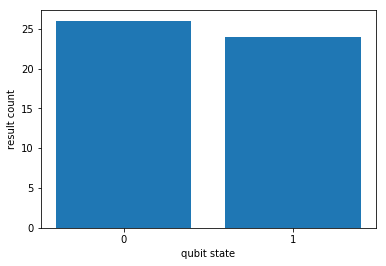

counts = [26. 24.]


In [17]:
"""Display the output distribution of a cirq.TrialResult."""
counts = cirq.plot_state_histogram(out)
print("counts =", counts)

<p style="text-align: justify;"> 
For such a simple quantum algorithm, any quantum computer simulator is essentially equivalent. However, as algorithms scale to larger numbers of qubits and larger numbers of gates, runtime of the simulator can become important. The best current methods for classically simulating quantum circuits peak at around 50 qubits due to memory requirements. For a fixed number of qubits, better simulators can simulate circuits with lower overall runtime, a desirable feature for many applications. 
</p>

<p style="text-align: justify;"> 
Below we test the performance of Cirq's `XmonSimulator` along these lines. Additionally, we discuss other important capabilities of quantum computer simulators such as noise modeling.
</p>

### <p style="text-align: center;"> 1. Performance of the Simulators </p> 

<p style="text-align: justify;"> 
Here we test the performance of Cirq's `XmonSimulator` using random quantum circuits with different numbers of qubits and total depth. The particular form of the circuit we will consider consists of random single qubit rotations on all qubits, then a layer of entangling CNOT gates with one qubit randomly selected as the control. We define the layer of single qubit rotations plus the layer of entangling CNOTs to have a depth of one. (A circuit diagram is shown below in the article.)
</p>

<p style="text-align: justify;"> 
The code for testing the simulator is contained in a separate Python file called `sim_test.py`. Within this file is a function, also called `sim_test`, which inputs the number of qubits, depth of the circuit, and number of times to run the circuit (also called _shots_ or _repetitions_). This function creates a random circuit of the form described above, runs it for the desired number of times, then returns the wall clock time for how long it took. An example of using this function is shown in the code cell below.
</p>

In [18]:
"""Simulator performance test for small circuit. Note circuit structure will be random."""
# import the simulator test function
from cirq_code import sim_test

# inputs to sim_test
nqubits = 4         # number of qubits
depth = 1           # depth of circuit
nreps = 1           # number of repetitions
verbose=True        # verbose output (prints circuit)
sim_type = 0        # 0 <==> XmonSimulator, 1 <==> Simulator

# do the timing test
time = sim_test(nqubits, depth, nreps, verbose=verbose, sim_type=sim_type)

# display the output
print("\nIt took %0.2f seconds to run the circuit above." % time)

Circuit structure shown below:
0: ───Rx(1.352π)───Ry(1.223π)───Rz(0.331π)───X───────M───────
                                             │
1: ───Rx(1.793π)───Ry(1.982π)───Rz(0.724π)───┼───X───M───────
                                             │   │
2: ───Rx(1.129π)───Ry(1.356π)───Rz(1.767π)───@───@───@───M───
                                                     │
3: ───Rx(1.079π)───Ry(0.589π)───Rz(1.365π)───────────X───M───

It took 0.04 seconds to run the circuit above.


For such a small circuit, the runtime is almost instantenous. As we scale to larger and larger circuits, however, the complexity of simulating the circuit increases. Below we up the scale to 20 qubits with a depth of 10.

In [19]:
"""Simulator performance test for larger circuit."""
# inputs to sim_test
nqubits = 20        # number of qubits
depth = 10          # depth of circuit
nreps = 1           # number of repetitions
verbose=False       # verbose output (prints circuit)

# do the timing test
time = sim_test(nqubits, depth, nreps, verbose=verbose)

# display the output
print("\nIt took %0.2f seconds to run the circuit." % time)


It took 32.05 seconds to run the circuit.


<p style="text-align: justify;"> 
Here the code takes noticably longer to run because the number of qubits and depth of the circuit are both larger now.
</p>

<p style="text-align: justify;"> 
For many applications, simulating large circuits quickly is an important task. We use the `sim_test` function above to test the performance of both the `Simulator` and `XmonSimulator` by sweeping over values of qubits and depth. In particular, we sweep over the qubit numbers $n = 10, 12, ..., 24$ and depths $d = 20, 40, ..., 100$ and time the simulator performance at each. The results of this study are displayed in the figure below.
</p>

<img src="cirq-sim-plot.png" width=600><img src="xmon-sim-plot.png" width=600>
<p style="text-align: center;">Plots showing the performance of the `Simulator` (top) and `XmonSimulator` (bottom). The horizontal axis shows the number of qubits and the vertical axis shows the depth as defined above. Dark green represents faster simulation time and bright yellow represents longer simulation time. Values in each square show total overall runtime in seconds, averaged over many runs. Color scales are different for each plot.</p>

<p style="text-align: justify;"> 
As can be seen, the performance of the `XmonSimulator` and `Simulator` are similar in terms of overall runtime. Depending on the computer architecture, increasing the number of threads or _shards_ could increase the performance of the `XmonSimulator`. (This is discussed below in Section 2.)
</p>

<p style="text-align: justify;"> 
The resource requirements (memory and runtime) for simulating larger circuits quickly reaches the limitations of current supercomputers. Researchers at Google are very interested in using a quantum computer to simulate some circuit that a classical computer cannot feasibly do, a feat called _quantum supremacy_. Cirq contains built-in functions for generating so-called "supremacy circuits," as can be seen below.
</p>

In [20]:
"""Display a quantum supremacy circuit on the first three rows of Bristlecone with a CZ depth of 5."""
print(cirq.generate_supremacy_circuit_google_v2_bristlecone(3, 5, 0))

              ┌──┐
(0, 5): ───H───T────@───────Y^0.5───T────────────────────H───
                    │
(0, 6): ───H───T────@───────@───────Y^0.5────────T───────H───
                            │
(1, 5): ───H───T────────────┼───────@────────────@───────H───
                            │       │            │
(1, 6): ───H───@────Y^0.5───@───────┼────X^0.5───@───────H───
               │                    │
(2, 5): ───H───┼T───@───────X^0.5───@────────────Y^0.5───H───
               │    │
(2, 6): ───H───@────@───────X^0.5───T────────────────────H───
              └──┘


<p style="text-align: justify;"> 
(In the circuit diagram, brackets at the top/bottom are placed when operations are in the same moment but it is impossible to draw them all in the same column. In the second moment, all $T$ gates and the Controlled-$Z$ gates, which are all encompassed by the top/bottom brackets, happen simulataneously.)
</p>

<p style="text-align: justify;"> 
As we've seen above, this small circuit using only three rows (six qubits) of Bristlecone could be easily simulated by a classical computer. However, extending the circuit to all qubits on Bristlecone generates a circuit that is extremely difficult to classically simulate. Quantum supremacy is expected to be announced within the next few years.
</p>

### <p style="text-align: center;"> 2. Features of the Simulators </p> 

<p style="text-align: justify;"> 
While raw performance is an important aspect of simulators, other features such as noise capabilities and special-purpose simulators (e.g., Clifford circuit simulators) are equally if not more important. In particular, noise capabilities allow users to mimic the evolution on real quantum hardware and get better estimates of the performance of their algorithms. The software packages pyQuil and QISKit contain these features.
</p>

<p style="text-align: justify;"> 
Currently, Cirq does not contain any obvious support for noisy circuit simulation in either the `Simulator` or `XmonSimulator`. As Cirq is still in alpha testing, however, these features are likely to be implemented in future releases.
</p>

<p style="text-align: justify;"> 
For now, notable features of the simulators include multi-threading for the `XmonSimulator` and access to the wave function for both simulators. To get a simulator that uses multiple threads, we can pass an `XmonOptions` object specified with the number of threads into the `XmonSimulator`, as shown below.
</p>

In [21]:
"""Get an XmonSimulator with multiple threads (shards)."""
options = cirq.google.sim.XmonOptions(num_shards=2)
simulator = cirq.google.XmonSimulator(options)

<p style="text-align: justify;"> 
This simulator can then be used to execute circuits in the same way as above.
</p>

<p style="text-align: justify;"> 
Additionally, there are two types of methods that simulators support, the "run methods" and the "simulate methods." The "run methods" (`run` and `run_sweep`) emulate quantum computer hardware and only return measurement results. (The `run` method is what we used above to test the simulator performance.) For full access to the wavefunction and for debugging purposes, the "simulate methods" (`simulate`, `simulate_sweep`, and `simulate_moment_steps`) can be used. An example of using a simulate method is shown below.
</p>

In [22]:
"""Use the "simulate methods" to get full access to the wavefunction."""
# make a bell state preparation circuit
circ = cirq.Circuit()
qbits = [cirq.LineQubit(x) for x in range(2)]
circ.append([cirq.H(qbits[0]), cirq.CNOT(qbits[0], qbits[1])])

# print out the circuit
print(circ)

# simulate the circuit
res = simulator.simulate(circ)

0: ───H───@───
          │
1: ───────X───


Once the circuit has been simulated, the result `res` is stored as a `SimulationTrialResult`. This output supports several useful features including generating the wavefunction, (reduced) density matrix, and even Dirac notation of the state. A few of these features are demonstrated below.

In [23]:
"""Use the output of a simulation to generate the wavefunction, density matrix, and Dirac notation."""
# show the wavefunction
print("The wavefunction of the final state is:\n", res.final_state, end="\n")

# show the Dirac notation for the state
print("\nThe Dirac notation for the final state is:\n", res.dirac_notation())

# show the density matrix of the total state
print("\nThe density matrix of the final state is:\n", res.density_matrix())

# show the reduced density matrix of the first qubit
print("\nThe reduced density matrix of the first qubit is:\n", res.density_matrix([0]))

The wavefunction of the final state is:
 [-3.0908623e-08+0.7071068j  2.5716280e-16+0.j
 -3.0908616e-08+0.j         6.1817239e-08+0.7071068j]

The Dirac notation for the final state is:
 (0.71j)|00⟩ + (0.71j)|11⟩

The density matrix of the final state is:
 [[ 5.0000006e-01+0.0000000e+00j -7.9485483e-24+1.8184158e-16j
   9.5534273e-16-2.1855694e-08j  5.0000006e-01+6.5567093e-08j]
 [-7.9485483e-24-1.8184158e-16j  6.6132707e-32+0.0000000e+00j
  -7.9485467e-24-0.0000000e+00j  1.5897095e-23-1.8184158e-16j]
 [ 9.5534273e-16+2.1855694e-08j -7.9485467e-24+0.0000000e+00j
   9.5534252e-16+0.0000000e+00j -1.9106853e-15+2.1855694e-08j]
 [ 5.0000006e-01-6.5567093e-08j  1.5897095e-23+1.8184158e-16j
  -1.9106853e-15-2.1855694e-08j  5.0000006e-01+0.0000000e+00j]]

The reduced density matrix of the first qubit is:
 [[5.0000006e-01+0.0000000e+00j 9.5534273e-16-2.1855694e-08j]
 [9.5534273e-16+2.1855694e-08j 5.0000006e-01+0.0000000e+00j]]


# <p style="text-align: center;"> III. Features of Cirq </p> 

<p style="text-align: justify;"> 
In the previous section, we looked at features of the quantum computer simulators of Cirq. In this section we discuss notable features of the entire Cirq platform, including methods for manipulating, parameterizing, compiling, and scheduling circuits. Since each "full-stack" software platform has the same goal (programming a quantum computer), the features of each are what set them apart. Our coverage is not comprehensive (see the documentation for all features) but consists of features we find particularly notable or useful.
</p>

## <p style="text-align: center;"> A. Manipulating Circuits </a></p> 

<p style="text-align: justify;"> 
As suggested by the name, the main utility of Cirq is working with and manipulating quantum ciruicts. By "manipulating quantum circuits," we mean operations of the following form:
</p>

* Creating quantum circuits.
* Performing arithmetic with circuits.
* Inserting instructions in a circuit.
* Removing instructions from a circuit.
* Gaining information about a circuit.

<p style="text-align: justify;"> 
In order to demonstrate these operations, we'll first import a function for creating quantum circuits with random single qubit gates.
</p>

In [24]:
"""Get a function for creating circuits with random one-qubit gates."""
from cirq_code import random_circuit

# create a random circuit with 5 qubits and 5 moments
circ, qbits = random_circuit(5, 5)
print(circ)

0: ───T───X───Y───H───────H───

1: ───Y───X───Z───X^0.5───Z───

2: ───X───Y───H───Z───────X───

3: ───H───H───T───X───────Y───

4: ───Z───H───T───Y───────T───


Circuits are stored as iterables of _moments_, where a moment is a set of operations that happens at the same time. To see each moment comprising a circuit, we can do the following:

In [25]:
"""Print out each moment in the circuit."""
for moment in circ:
    print(moment)

T(0) and Y(1) and X(2) and H(3) and Z(4)
X(0) and X(1) and Y(2) and H(3) and H(4)
Y(0) and Z(1) and H(2) and T(3) and T(4)
H(0) and X**0.5(1) and Z(2) and X(3) and Y(4)
H(0) and Z(1) and X(2) and Y(3) and T(4)


This output tells us exactly what we see in the circuit diagram above as we move from left to right in the algorithm.

<p style="text-align: justify;"> 
Arithmetic can be performed on circuits in a natural way. For example, the sum of two circuits is a circuit consisting of all moments of the first circuit then all moments from the second circuit. Circuits multiplication is repeated addition. While simple, these operations are very useful when designing circuits, especially variational circuits. (Note that pyQuil and QISKit also have circuit arithmetic.) In this case, one circuit can be dedicated to, say, state preparation, while the other contains the variational ansatz. The circuit to be executed then consists of the sum of the two.
</p>

<p style="text-align: justify;"> 
In many other cases with variational algorithms, it is desirable to remove specific gates from a circuit. Cirq provides a simple built-in method to perform this task, demonstrated below.
</p>

In [26]:
"""Clear operations from a circuit."""
circ.clear_operations_touching(qbits[1:4], range(1, 4))
print(circ)

0: ───T───X───Y───H───H───

1: ───Y───────────────Z───

2: ───X───────────────X───

3: ───H───────────────Y───

4: ───Z───H───T───Y───T───


<p style="text-align: justify;"> 
In the same manner, Cirq contains methods for inserting operations into a circuit, such as `batch_insert`, which inserts a sequence of (location, operation) pairs into the circuit, as demonstrated below.
</p>

In [27]:
"""Insert operations into a circuit at specific locations."""
circ.batch_insert([(1, cirq.CZ(qbits[2], qbits[3])), 
                   (2, cirq.CNOT(qbits[1], qbits[3]))])
print(circ)

0: ───T───X───Y───H───H───

1: ───Y───────@───────Z───
              │
2: ───X───@───┼───────X───
          │   │
3: ───H───@───X───────Y───

4: ───Z───H───T───Y───T───


<p style="text-align: justify;"> 
Here we have inserted two-qubit gates (for clarity) into the region in which we previously moved gates. As mentioned, operations of this form are particularly useful for programming variational quantum algorithms. A full set of circuit methods returning information about the circuit or modifying the circuit in place can be found in the documentation.
</p>

## <p style="text-align: center;"> B. Parameterizing Circuits </p> 

<p style="text-align: justify;"> 
Because of Cirq's strong support for variational quantum algorithms (in which parameters/angles of an algorithm are iteratively changed to minimize an energy or cost function), the library provdies useful features for working with these types of circuits. In particular, two components are particularly notable for this task: `Symbol`s and simulating/running "sweeps" of circuits, which we now elaborate on.
</p>

<p style="text-align: justify;"> 
Rather than having to create a new quantum circuit for every new set of variables, Cirq allows gates with parmaeters to have `Symbol`s, which can be resolved by a `ParamResolver` with a given set of angles. In addition to cleaning up code, this decreases overall runtime of programs by again avoiding the task of creating a new quantum circuit for every given set of angles. An example of creating a circuit with `Symbol`s is shown below.
</p>

In [28]:
"""Create a circuit that contains a symbol."""
# get a circuit and some qubits
circ = cirq.Circuit()
qbit = cirq.LineQubit(0)

# add a gate with a definite angle
circ.append([cirq.XPowGate(exponent=np.pi / 2)(qbit)])

# add a gate with a symbol which can take any value
sym = cirq.Symbol("t")
gate = cirq.XPowGate(exponent=sym)
circ.append([gate(qbit)])

# add a measurement
circ.append(cirq.measure(qbit, key="z"))

# show the circuit diagram
print(circ)

0: ───X^(-3/7)───X^t───M('z')───


<p style="text-align: justify;"> 
When we print out the circuit diagram, we see that we have one gate with a definite parameter (the first gate) and another with a symbol $t$, which we must instantiate with a value before trying to run a circuit. One way to do this is to explicitly use a `ParamResolver` to give $t$ a value, as follows.
</p>

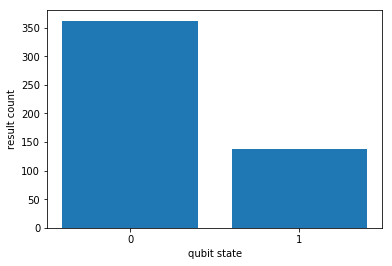

In [29]:
"""Run a parameterized circuit by resolving the circuit with a ParamResolver."""
# get a param resolver
param_resolver = cirq.ParamResolver({sym.name: np.pi / 4})

# run the resolved circuit using the param resolver
res = simulator.run(circ, param_resolver, repetitions=500)

# plot the output distribution
vals = cirq.plot_state_histogram(res)

<p style="text-align: justify;"> 
With this method, we only have to change the value of the `ParamResolver` to change the circuit. By looping over many values, we can find the minimum of some cost function defined for a variational algorithm. A slightly simplified way to do this in Cirq is by using the "sweep" methods, e.g. `run_sweep` or `simulate_sweep`, to loop over these values automatically. A simple example of doing so using the same circuit above is as follows.
</p>

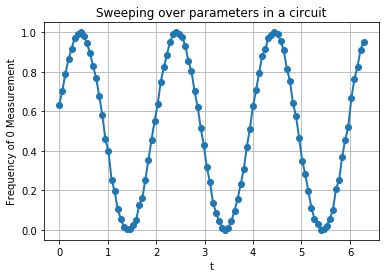

In [30]:
"""Sweep over a set of values to run a parameterized circuit at."""
# get a "sweep" of values
sweep = cirq.Linspace(key=sym.name, start=0, stop=2 * np.pi, length=100)

# run the circuit at all values in the sweep
res = simulator.run_sweep(circ, sweep, repetitions=1000)

# plot the frequency of zero outputs for all values in the sweep
tvals = [x[0][1] for x in sweep.param_tuples()]
cvals = [res[i].histogram(key="z")[0]/1000 for i in range(len(res))]
plt.plot(tvals, cvals, "-o", linewidth=2)

# plot style
plt.grid(); plt.xlabel("t"); plt.ylabel("Frequency of 0 Measurement"); plt.title("Sweeping over parameters in a circuit");

## <p style="text-align: center;"> C. Optimizing Circuits </p> 

<p style="text-align: justify;"> 
<i>Quantum compiling</i> consists of rewriting a given algorithm in terms of gates a quantum computer can actually implement (a <i>native gate set</i> or simply <i>gate set</i>). A similar problem is that of <i>quantum circuit optimization</i>, by which we mean rewriting a quantum circuit to contain as few gates as possible. Practical considerations always require a gate set to be specified, but in many situations it is desirable to simplify a circuit inasmuch as possible. For example, we would never implement two Pauli operations ($X$, $Y$, $Z$) in sequence because they square to the identity. Similar ideas apply to other gates.
</p>

<p style="text-align: justify;"> 
Cirq provides several utilities for quantum circuit optimization, which we demonstrate below. First, we obtain a random circuit consisting of only single qubit gates for simplicity.
</p>

In [31]:
"""Get a random circuit."""
circ, qbits = random_circuit(4, 5)

print(circ)

0: ───T───────X^0.5───H───Y───────X───────

1: ───X───────Y───────Y───X───────Y───────

2: ───Y───────T───────H───X^0.5───X───────

3: ───X^0.5───Y───────H───T───────X^0.5───


<p style="text-align: justify;"> 
The random circuit we obtained is shown above. The first optimization pass we will try is `EjectZ`, which rewrites the circuit by attempting to push all $Z$ gates to the end of the circuit.
</p> 

In [32]:
"""Push Z gates toward the end of the circuit."""
ejectZ = cirq.optimizers.EjectZ()
ejectZ.optimize_circuit(circ)
print(circ)

0: ───────────PhasedX(-0.25)^0.5───T───H───Y───────X────────────────────────

1: ───X───────Y────────────────────────Y───X───────Y────────────────────────

2: ───Y───────T────────────────────────H───X^0.5───X────────────────────────

3: ───X^0.5───Y────────────────────────H───────────PhasedX(-0.25)^0.5───T───


<p style="text-align: justify;"> 
As we can see, all $Z$ operations now appear at the right-most portion of the circuit. Next we will perform a similar optimization pass, this time attempting to push $X$, $Y$, and `PhasedXPow` gates to the right.
</p> 

In [33]:
"""Push X, Y, and PhasedXPow gates toward the end of the circuit."""
ejectPaulis = cirq.optimizers.EjectPhasedPaulis()
ejectPaulis.optimize_circuit(circ)

print(circ)

0: ───────────PhasedX(-0.25)^0.5───T────────────────H───────────Z────────────────────────

1: ───────────Z─────────────────────────────────────────Z───────Y────────────────────────

2: ────────────────────────────────PhasedX(0.625)───H───X^0.5───X────────────────────────

3: ───X^0.5────────────────────────Y────────────────H───────────PhasedX(-0.25)^0.5───T───


<p style="text-align: justify;">
Another circuit optimization provided by Cirq is merging all single qubit gates into `PhasedXPow` and `PhasedZPow` gates, which we demonstrate below.
</p>

In [34]:
"""Merge single qubit gates into PhasedX and PhasedZ gates."""
cirq.merge_single_qubit_gates_into_phased_x_z(circ)

print(circ)

0: ─────────────PhasedX(-0.75)^0.5───Z^0.75────────────────────────

1: ─────────────Y──────────────────────────────────────────────────

2: ──────────────────────────────────PhasedX(0.25)^0.5───Z^-0.75───

3: ───X^-0.25───S──────────────────────────────────────────────────


<p style="text-align: justify;">
We see that the entire circuit is now expressed in terms of these gates. As a last touch, we can attempt to drop any gates that have a "negligible" (i.e., very small) effect on the overall circuit and drop empty `moment`s in the circuit.
</p>

In [35]:
"""Removes operations with a tiny effect and drop empty moments in the circuit."""
# drop negligible gates
drop = cirq.optimizers.DropNegligible()
drop.optimize_circuit(circ)

# drop empty moments
mom_drop = cirq.optimizers.DropEmptyMoments()
mom_drop.optimize_circuit(circ)

print(circ)

0: ─────────────PhasedX(-0.75)^0.5───Z^0.75────────────────────────

1: ─────────────Y──────────────────────────────────────────────────

2: ──────────────────────────────────PhasedX(0.25)^0.5───Z^-0.75───

3: ───X^-0.25───S──────────────────────────────────────────────────


<p style="text-align: justify;">
Cirq also allows single qubit gates to be merged into arbitrary two by two unitary transformations. These may not in general have a specified name like $H$, $T$, etc., so the quantum circuit drawer simply shows matrix elements:
</p>

In [36]:
"""Merge single qubit gates."""
merge = cirq.optimizers.MergeSingleQubitGates()
merge.optimize_circuit(circ)

print(circ)

0: ───────────────────────────────────┌                           ┐───────────────────────────────
                                      │ 0.5  +0.5j    0.   +0.707j│
                                      │ 0.5  -0.5j   -0.707+0.j   │
                                      └                           ┘

1: ───────────────────────────────────┌             ┐─────────────────────────────────────────────
                                      │0.+0.j 0.-1.j│
                                      │0.+1.j 0.+0.j│
                                      └             ┘

2: ───────────────────────────────────────────────────────────────────┌                       ┐───
                                                                      │ 0.5+0.5j    0. -0.707j│
                                                                      │-0.5-0.5j    0. -0.707j│
                                                                      └                       ┘

3: ───┌                           ┐───────────

<p style="text-align: justify;">
We note that optimized circuits can be run/simulated with either the `Simulator` or `XmonSimulator` and that optimizing circuits before simulating them may result in improved performance. Below we simulate the above optimized circuit and display its wavefunction in Dirac notation.
</p>

In [37]:
"""Run the optimized circuit and display it's wavefunction in Dirac notation."""
res = simulator.simulate(circ)
print(res.dirac_notation())

(-0.33+0.33j)|0100⟩ + (0.14-0.14j)|0101⟩ + (0.33-0.33j)|0110⟩ + (-0.14+0.14j)|0111⟩ + (0.33+0.33j)|1100⟩ + (-0.14-0.14j)|1101⟩ + (-0.33-0.33j)|1110⟩ + (0.14+0.14j)|1111⟩


<p style="text-align: justify;">
The Dirac notation of the wavefunction above corresponds to the same wavefunction we would have obtained by simulating the original circuit. Here, we acheived the same effect with much fewer gates.
</p>

<p style="text-align: justify;">
Of course, a given quantum computer cannot implement arbitrary gates like the simulator has done above. As mentioned, these gates need to be compiled into operations the computer can implement. Cirq provides this functionality with a `Device`, as we elaborate on below.
</p>

## <p style="text-align: center;"> D. Devices and Schedules </p> 

<p style="text-align: justify;">
The existence of `Device`s and `Schedule`s again reflects Cirq's emphasis on near-term quantum computing. Briefly, a `Device` corresponds to a quantum computer with given constraints such as qubit connectivity and native gate sets. A `Schedule` corresponds to the real-time implementation of operations on a `Device`. Users have full control to specify any quantum computer architecture using a `Device` and can program a circuit for any given quantum computer. Because the documentation contains detailed information on user-defined devices and schedules, we omit this discussion here. Instead, we provide information on `Device`s by analyzing one that is already defined in Cirq. Namely, the Foxtail quantum computer.
</p>

<p style="text-align: justify;">
In the following code, we create a quantum circuit with it's device set as Foxtail:
</p>

In [103]:
"""Make a quantum circuit whose device is the 22 qubit Foxtail quantum computer."""
# grab the device
foxtail = cirq.google.Foxtail

# get the qubits of foxtail
qbits = list(foxtail.qubits)

# make a circuit and set foxtail to be its device
circ = cirq.Circuit(device=foxtail)

<p style="text-align: justify;">
Once we grab the `Foxtail` device, we can get it's qubits and then create a circuit. We can use the method `decompose_operation` of a `Device` to compile/decompose a gate operation. Below we show this for the example of the Hadmard gate.
</p>

In [104]:
"""Compile/decompose operations into the native gate set of Foxtail."""
# get the hadmard gate
hgate = cirq.H(qbits[0])

# compile/decompose the gate into native operations
compiled_hgate = foxtail.decompose_operation(hgate)

# print out the gate and it's compilation
print(hgate, "=", compiled_hgate)

H((1, 3)) = [(cirq.Y**-0.5).on(cirq.GridQubit(1, 3)), (cirq.Z**-1.0).on(cirq.GridQubit(1, 3))]


<p style="text-align: justify;">
Once we have compiled gates, we can append them into the circuit. Alternatively, if we add any gate operation into a circuit, they will get compiled automatically. Below we show this for the Bell state preparation circuit consisting of a Hadamard and CNOT gate.
</p>

In [105]:
"""Adding operations to a circuit with a device compiles them automatically."""
# cnot gate
cnot = cirq.CNOT(qbits[0], qbits[1])

# append the operations
circ.append([hgate, cnot])

# print the circuit
print(circ)

(1, 3): ───Y^-0.5───Z───────────────────@──────────────────────
                                        │
(1, 4): ────────────PhasedX(-0.5)^0.5───@───PhasedX(0.5)^0.5───


<p style="text-align: justify;">
Here we can see the native operations of Foxtail (which are the same for Bristlecone). When running the circuit, these are the gates the computer actually implements. Another useful feature of `Device`s is that they contain timing information for each of the native gates. (When programming a user-defined `Device`, these values can be specified to match an arbitrary computer.) To see this information, we can use the `duration_of` method to see how long each native gate takes to implement.
</p>

In [108]:
"""See how long each native operation takes to implement."""
# grab the times of some native gates
ytime = foxtail.duration_of(cirq.Y(qbits[0]))
ztime = foxtail.duration_of(cirq.Z(qbits[0]))
cztime = foxtail.duration_of(cirq.CZ(qbits[0], qbits[1]))

# print them out
print("Y time =", ytime.total_nanos(), "nanoseconds.")
print("Z time =", ztime.total_nanos(), "nanoseconds.")
print("CZ time =", cztime.total_nanos(), "nanoseconds.")

Y time = 20.0 nanoseconds.
Z time = 0.0 nanoseconds.
CZ time = 50.0 nanoseconds.


<p style="text-align: justify;">
Here we see that the single qubit gate $Y$ takes 20 nanoseconds to implement (on any qubit), and the two-qubit gate Controlled-$Z$ takes over twice as long to implement at 50 nanoseconds. The $Z$ gate takes no time to implement because it is a "virtual" gate. That is, it is implemented by shifting the clock of the software keeping track of the qubit and not implementing any physical operation like the $Y$ or Controlled-$Z$ gate.
</p>

## <p style="text-align: center;"> E. Other Features </p> 

<p style="text-align: justify;">
To conlcude this section, we briefly mention other notable features of Cirq. 
</p>

<p style="text-align: justify;">
In terms of library support, which we define to mean any built-in algorithms or examples demonstrating how to implement algorithms, several companies have used Cirq in collaboration with Google for various projects. For example, <a href="https://zapatacomputing.com/">Zapata Computing</a> used Cirq to implement a quantum autoencoder, <a href="https://qcware.com/press/20180718">QC Ware</a> used Cirq for implementing QAOA, and <a href="https://heisenberg.xyz/news/2018/07/heisenberg-cirq/">Heisenberg Quantum Simulations</a> used Cirq to simulate the Anderson model. The documentation of Cirq contains an in-depth <a href="https://cirq.readthedocs.io/en/stable/tutorial.html">tutorial</a> of a variational quantum algorithm, and the <a href="https://github.com/quantumlib/Cirq/tree/master/examples">examples folder on Cirq's GitHub</a> contains detailed Python scripts on Grover's algorithm, the quantum Fourier Transform, the phase estimation algorithm, the Bernstein-Vazirani algorithm, and an example preparing BCS ground states for superconductors/superfluids.
</p>

<p style="text-align: justify;">
Cirq also contains integration with <a href="https://github.com/quantumlib/OpenFermion">OpenFermion</a>, a hardware-agnostic library for simulating fermionic systems on quantum computers, through <a href="https://github.com/quantumlib/OpenFermion-Cirq">OpenFermion-Cirq</a>. This library, also in alpha release, is focused on extending the functionality of OpenFermion "by providing routines and tools for using Cirq to compile and compose circuits for quantum simulation algorithms" (from the README).
</p>

<p style="text-align: justify;">
Notable other features of the Cirq library are quantum channels and stabilizers. These features are still labeled "work in progress" in the documentation, so for fairness we do not delve into these topics but rather note them as interesting and useful features once they are completed.
</p>

# <p style="text-align: center;"> IV. Example Algorithms </p> 

In this final section, we look at example algorithms programmed in Cirq.

## <p style="text-align: center;"> A. Quantum Teleportation Algorithm </p> 

<p style="text-align: justify;"> 
For consistency with our comparison of pyQuil, QISKit, ProjectQ, and the Quantum Developer Kit <a href="#LaR2018">[LaR2018]</a>, we include a complete program for the quantum teleportation algorithm below. This algorithm teleports an arbitrary quantum state $|\psi\rangle$ (which we take to be $|1\rangle = X |0\rangle$ for example below) from one person, Alice, to another, Bob, without either one knowing what the actual state is. More complete descriptions of this protocol can be found in any standard source on quantum computing, for example the <a href="https://quantumcomputingreport.com/resources/education/">ones listed here</a>.
</p>

In [113]:
"""Quantum teleportation algorithm written in Cirq."""
# get qubits and a circuit
qbits = [cirq.LineQubit(x) for x in range(3)]
circ = cirq.Circuit()

# Alice wants to teleport |1> to Bob
circ.append(cirq.ops.X(qbits[0]))

# Bell state preparation on Bob's qubits
circ.append([cirq.ops.H(qbits[1]),
    cirq.ops.CNOT(qbits[1], qbits[2])])
            
# Bell state measurement on Alice's qubits
circ.append([cirq.ops.H(qbits[0]),
    cirq.ops.CNOT(qbits[0], qbits[1]),
    cirq.measure(qbits[0]),
    cirq.measure(qbits[1])])

# print out the circuit
print(circ)

0: ───X───────────H───@───M───
                      │
1: ───────H───@───────X───M───
              │
2: ───────────X───────────────


<p style="text-align: justify;"> 
To the author's knowledge, there does not exist an easy way to perform classical conditional operations, such as those required by the quantum teleportation algorithm, in Cirq. However, we can use the "simulate" methods of Cirq to get the state of the third qubit, as shown below. Note that both measurement outcomes are deterministically zero in this situation, so no conditional operations are required.
</p>

In [114]:
"""Verify the state of the third qubit is |1> using the simulate methods."""
# simulate the circuit with access to the wavefunction
res = simulator.simulate(circ)

# print out the densitry matrix, which should be
# [[0, 0],
#  [0, 1]]
print(res.density_matrix([2]))

[[ 7.6427419e-15+0.000000e+00j -1.5285484e-14+8.742277e-08j]
 [-1.5285484e-14-8.742277e-08j  9.9999988e-01+0.000000e+00j]]


<p style="text-align: justify;"> 
To within floating point precision, this is exactly the density matrix we expect.
</p>

## <p style="text-align: center;"> B. Variational Algorithm </p> 

In [118]:
"""Implementation of the VQSD algorithm on a simple one qubit state."""
# =======
# imports
# =======
from cirq_code import rot

# ====================
# get number of qubits
# ====================
n = 2
qbits = [cirq.LineQubit(x) for x in range(n)]

# =========================
# state preparation circuit
# =========================
prep = cirq.Circuit()
prep.append([cirq.H(qbits[x]) for x in range(n)])

# ==============
# ansatz circuit
# ==============
# get a circuit
ansatz = cirq.Circuit()

# get some symbols
symbols = [cirq.Symbol(x) for x in range(6)]




# =================
# diag test circuit
# =================


diag = circ.Circuit()



ImportError: cannot import name 'rot'

# <p style="text-align: center;"> V. Comparisons and Conclusions </p> 

# <p style="text-align: center;"> References </p> 

<a name="Al2018">[Al2018]</a> A. Ho and D. Bacon, "Announcing Cirq: An Open Source Framework for NISQ Algorithms," <a href="https://ai.googleblog.com/2018/07/announcing-cirq-open-source-framework.html">https://ai.googleblog.com/2018/07/announcing-cirq-open-source-framework.html</a>, Jul. 2018.

<a name="An2018">[An2018]</a> E. R. Anschuetz, J. P. Olson, A. Aspuru-Guzik, and Y. Cao, “Variational Quantum Factoring,” arXiv:1808.08927 [quant-ph], Aug. 2018.

<a name="Du2018">[Du2018]</a> Dumitrescu, E. F. et al. Cloud Quantum Computing of an Atomic Nucleus. Physical Review Letters 120, (2018).

<a name="Fa2014">[Fa2014]</a>] E. Farhi, J. Goldstone, and S. Gutmann, “A Quantum Approximate Optimization Algorithm,” arXiv:1411.4028 [quant-ph], Nov. 2014.

<a name="Kh2018">[Kh2018]</a> S. Khatri, R. LaRose, A. Poremba, L. Cincio, A. T. Sornborger, and P. J. Coles, “Quantum-assisted quantum compiling,” arXiv:1807.00800 [quant-ph], Jul. 2018.

<a name="La2018">[La2018]</a> R. LaRose, A. Tikku, É. O’Neel-Judy, L. Cincio, and P. J. Coles, “Variational Quantum State Diagonalization,” arXiv:1810.10506 [quant-ph], Oct. 2018.

<a name="LaR2018">[LaR2018]</a> R. LaRose, “Overview and Comparison of Gate Level Quantum Software Platforms,” arXiv:1807.02500 [quant-ph], Jul. 2018.

<a name="Ma2018">[Ma2018]</a> I. L. Markov, A. Fatima, S. V. Isakov, and S. Boixo, “Quantum Supremacy Is Both Closer and Farther than It Appears,” arXiv:1807.10749 [quant-ph], Jul. 2018.

<a name="Ne2017">[Ne2017]</a> C. Neill et al., “A blueprint for demonstrating quantum supremacy with superconducting qubits,” Sep. 2017.

<a name="Pe2014">[Pe2014]</a> A. Peruzzo et al., “A variational eigenvalue solver on a quantum processor,” Nature Communications, vol. 5, no. 1, Dec. 2014.

<a name="Wa2018">[Wa2018]</a> Z. Wang, S. Hadfield, Z. Jiang, and E. G. Rieffel, “The Quantum Approximation Optimization Algorithm for MaxCut: A Fermionic View,” Physical Review A, vol. 97, no. 2, Feb. 2018.